### Module Import

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np

### Load Data and Processing

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 29s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


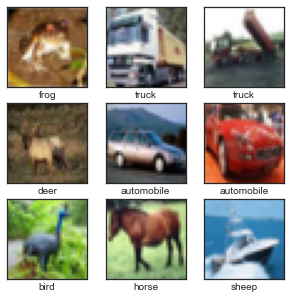

In [9]:
np.random.seed(1630)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_full[i])
    plt.xlabel(class_names[int(y_train_full[i])])

plt.show()

In [6]:
x_mean = np.mean(x_train_full, axis=(0, 1, 2))
x_std = np.std(x_train_full, axis=(0, 1, 2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3)

In [8]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


### Build Model and Compile

In [9]:
def model_build():
  model = Sequential()

  input = Input(shape=(32, 32, 3))

  output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [10]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0     

### Train and Evaluate Model


In [11]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - 36s 20ms/step - loss: 2.0690 - accuracy: 0.2484 - val_loss: 1.6156 - val_accuracy: 0.4261
Epoch 2/30
137/137 [==============================] - 2s 13ms/step - loss: 1.5411 - accuracy: 0.4542 - val_loss: 1.4355 - val_accuracy: 0.4923
Epoch 3/30
137/137 [==============================] - 2s 13ms/step - loss: 1.4040 - accuracy: 0.5002 - val_loss: 1.3375 - val_accuracy: 0.5252
Epoch 4/30
137/137 [==============================] - 2s 13ms/step - loss: 1.3078 - accuracy: 0.5380 - val_loss: 1.2938 - val_accuracy: 0.5455
Epoch 5/30
137/137 [==============================] - 2s 14ms/step - loss: 1.2454 - accuracy: 0.5606 - val_loss: 1.2280 - val_accuracy: 0.5685
Epoch 6/30
137/137 [==============================] - 2s 13ms/step - loss: 1.1996 - accuracy: 0.5765 - val_loss: 1.2299 - val_accuracy: 0.5677
Epoch 7/30
137/137 [==============================] - 2s 13ms/step - loss: 1.1439 - accuracy: 0.5985 - val_loss: 1.1951 - val_accuracy: 0.574

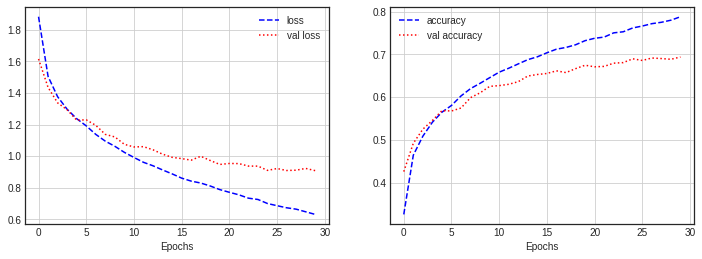

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='val accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [18]:
def model_build2():
  model = Sequential()

  input = Input(shape=(32, 32, 3))

  output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(input)

  output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
  output = Dropout(0.5)(output)

  output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [19]:
model = model_build2()
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         7385

In [20]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - 2s 14ms/step - loss: 2.6685 - accuracy: 0.1891 - val_loss: 4.1037 - val_accuracy: 0.1007
Epoch 2/30
137/137 [==============================] - 2s 11ms/step - loss: 1.7821 - accuracy: 0.3345 - val_loss: 5.0955 - val_accuracy: 0.1355
Epoch 3/30
137/137 [==============================] - 2s 11ms/step - loss: 1.6424 - accuracy: 0.3953 - val_loss: 2.9553 - val_accuracy: 0.2251
Epoch 4/30
137/137 [==============================] - 2s 11ms/step - loss: 1.5267 - accuracy: 0.4401 - val_loss: 1.8334 - val_accuracy: 0.3912
Epoch 5/30
137/137 [==============================] - 2s 11ms/step - loss: 1.4474 - accuracy: 0.4761 - val_loss: 1.4813 - val_accuracy: 0.4906
Epoch 6/30
137/137 [==============================] - 2s 11ms/step - loss: 1.3759 - accuracy: 0.5041 - val_loss: 1.3124 - val_accuracy: 0.5215
Epoch 7/30
137/137 [==============================] - 2s 11ms/step - loss: 1.3198 - accuracy: 0.5330 - val_loss: 1.2233 - val_accuracy: 0.5622

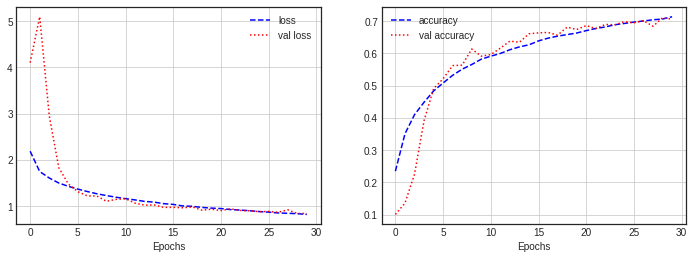

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='val accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()